In [3]:
import numpy as np
import pandas as pd
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
from PIL import Image
from ann_visualizer.visualize import ann_viz;

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#from keras.preprocessing.image import ImageDataGenerator
#from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
%matplotlib inline

In [4]:
imagePatches = glob('/Users/abhivyaktisatti/Desktop/ML/archive/*/*/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

In [5]:
image_sample = "/Users/abhivyaktisatti/Desktop/ML/archive/9036/0/9036_idx5_x1051_y2401_class0.png"
dsize=(50,50)

image = cv2.imread(image_sample)
image = cv2.resize(image, dsize)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')

[ WARN:0@43.050] global loadsave.cpp:241 findDecoder imread_('/Users/abhivyaktisatti/Desktop/ML/archive/9036/0/9036_idx5_x1051_y2401_class0.png'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [8]:
resized_images,labels_arr = [],[]
dsize=(50,50)
    
for img in imagePatches[0:20000]:
    full_size_image = cv2.imread(img)
    resized_images.append(cv2.resize(full_size_image, dsize, interpolation=cv2.INTER_CUBIC))
    labels_arr.append(int(img[-5]))

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import os

# Example: Load your dataset from a folder
# Assuming you have a directory of images and their corresponding labels

# Define the path to your image directory
image_directory = 'path_to_your_images'  # Replace with the path to your images
image_size = (75, 100)  # Resize images to this size if needed

# Initialize empty lists for images and labels
X = []  # Features (images)
y = []  # Labels

# Loop through the image directory and load the images and labels
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        img = Image.open(os.path.join(image_directory, filename))
        img = img.resize(image_size)  # Resize to a fixed size (e.g., 75x100)
        
        # Convert image to numpy array and append to X
        img_array = np.array(img)
        X.append(img_array)
        
        # Extract label from the filename (assuming labels are part of the filename)
        label = int(filename.split('_')[0])  # Example: "1_image.jpg" -> label = 1
        y.append(label)

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Now split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_images'

In [16]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [10]:
from PIL import Image
import numpy as np

# Reshape to approximate original shape (assume 75x100 for example)
X_test_images = X_test.reshape(-1, 75, 100)

# Resize each image to 28x28
X_test_resized = np.array([np.array(Image.fromarray(img).resize((28, 28))) for img in X_test_images])

# Add a channel dimension for grayscale
X_test_resized = X_test_resized.reshape(-1, 28, 28, 1)

# Normalize the data
X_test_resized = X_test_resized / 255.0

print("Resized data shape:", X_test_resized.shape)


NameError: name 'X_test' is not defined

In [91]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Dense(128, activation='relu', input_shape=(7500,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Adjust the number of classes
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [92]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0


In [93]:
print("Model input shape:", model.input_shape)


Model input shape: (None, 7500)


In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(28, 28, 1)),  # Input shape for grayscale images (28x28x1)
    
    # Convolutional layer with 32 filters and 3x3 kernel
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),  # Max pooling layer to reduce spatial dimensions

    # Additional convolutional layer with 64 filters
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    # Flatten the output from convolutional layers to feed into dense layers
    Flatten(),
    
    # Fully connected layers
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    
    # Output layer with softmax activation (adjust the number of classes)
    Dense(10, activation='softmax')  # 10 classes (adjust based on your dataset)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model to see the architecture
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,258 (1.64 MB)

 Trainable params: 429,258 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(len(a)-np.sum(b)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(resized_images,labels_arr)

Total number of images: 20000
Number of IDC(-) Images: 16051
Number of IDC(+) Images: 3949
Image shape (Width, Height, Channels): (50, 50, 3)


In [1]:
X=np.array(resized_images)
Y=pd.Series(labels_arr) 
X=X/255.0
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, )

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

NameError: name 'np' is not defined

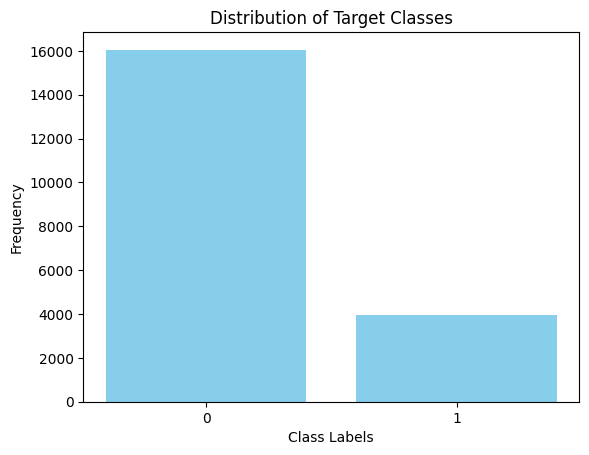

In [85]:
classes, counts = np.unique(Y, return_counts=True)  

plt.bar(classes, counts, color='skyblue')  
plt.xlabel('Class Labels')  
plt.ylabel('Frequency')     
plt.title('Distribution of Target Classes')  
plt.xticks(classes)      
plt.show()            


In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_resampled, y_resampled = smote.fit_resample(X_train_flat, Y_train)

print("Resampled dataset shape:", Counter(y_resampled))

n_samples, n_features = X_resampled.shape
image_size = 64 * 64 * 3  
if n_features % image_size == 0:
    X_resampled = X_resampled.reshape(-1, 64, 64, 3)  # Adjust size as per your images
else:
    print("Error: Cannot reshape the data to the target image size.")

print("Reshaped resampled dataset shape:", X_resampled.shape)


Resampled dataset shape: Counter({1: 11221, 0: 11221})
Error: Cannot reshape the data to the target image size.
Reshaped resampled dataset shape: (22442, 7500)


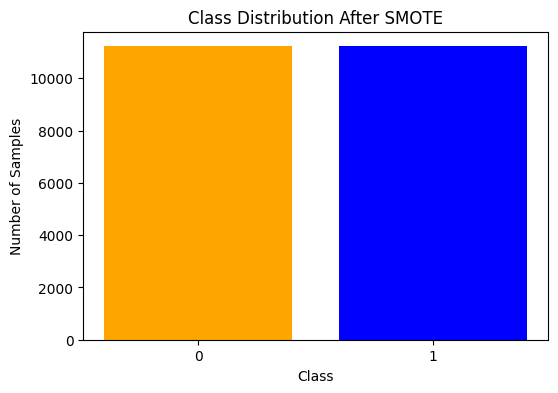

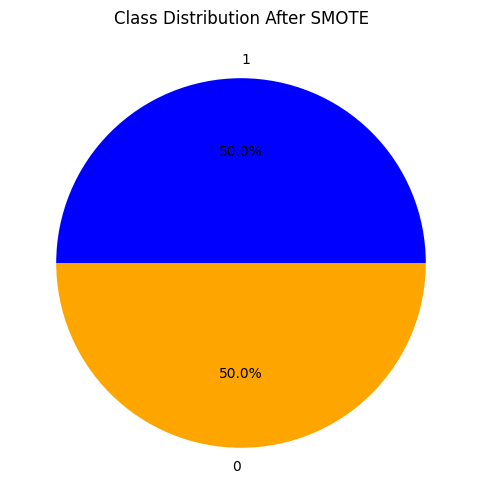

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

# Check the distribution of classes in the resampled dataset
class_distribution = Counter(y_resampled)

# Plot the distribution as a bar chart
plt.figure(figsize=(6, 4))
plt.bar(class_distribution.keys(), class_distribution.values(), color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After SMOTE')
plt.xticks(list(class_distribution.keys()))
plt.show()

# Alternatively, you can plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_distribution.values(), labels=class_distribution.keys(), autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Class Distribution After SMOTE')
plt.show()


In [24]:
image_shape = 50*50*3

X_train = X_train.reshape(X_train.shape[0], image_shape)
X_test = X_test.reshape(X_test.shape[0], image_shape)



In [25]:
print("Shape of flattened training data:",X_train.shape,"\nShape of flatened testing data: ",X_test.shape)

Shape of flattened training data: (14000, 7500) 
Shape of flatened testing data:  (6000, 7500)


In [26]:
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.utils import to_categorical

Rus = RandomUnderSampler(sampling_strategy='auto')

X_trainRusFlat, Y_trainRus = Rus.fit_resample(X_train, Y_train)
X_testRusFlat, Y_testRus = Rus.fit_resample(X_test, Y_test)

X_trainRus = X_trainRusFlat.reshape(len(X_trainRusFlat),50,50,3)
X_testRus = X_testRusFlat.reshape(len(X_testRusFlat),50,50,3)

Y_trainRus = to_categorical(Y_trainRus, num_classes = 2)
Y_testRus = to_categorical(Y_testRus, num_classes = 2)

In [27]:
print("New shape of Train data =",X_trainRus.shape)
print("New shape of Test data =",X_testRus.shape)

New shape of Train data = (5558, 50, 50, 3)
New shape of Test data = (2340, 50, 50, 3)


In [28]:
class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotLearningCurve():
    
    plt.figure(figsize=(10,6))
    metrics = np.load('logs.npy', allow_pickle=True)[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')
    
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')

def plot_learning_curve(history):
    
    plt.figure(figsize=(10,6))
    
    #model accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    # model loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
def plot_confusion_matrix(cm, normalize=False, cmap=plt.cm.Blues):
    title='Confusion matrix'
    classes = {0: 'IDC(-)', 1: 'IDC(+)'}
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def build_base_CNN(num_classes=2, input_shape=(50, 50, 3)):
    model = Sequential()
    
    # First Convolutional Layer
    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    # Second Convolutional Layer
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    # Flatten the output before feeding into Dense layer
    model.add(Flatten())
    
    # First Dense Layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    
    # Output Layer
    model.add(Dense(num_classes, activation='sigmoid'))  # For binary classification
    
    return model


In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, GlobalAveragePooling2D

def build_final_CNN(num_classes=2, input_shape=(64, 64, 3)):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.2))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.3))

    # Add GlobalAveragePooling2D to reduce the dimensions
    model.add(GlobalAveragePooling2D())

    # Flatten the output of the convolutional layers
    model.add(Flatten())

    # Dense layer with the correct number of units
    model.add(Dense(30, activation='relu'))  # Adjusted to 30 units to match expected output
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='sigmoid'))  # For binary classification

    # Print the model summary
    model.summary()

    return model


In [31]:
import numpy as np
from tensorflow.keras.callbacks import Callback

class SaveLogsCallback(Callback):
    def __init__(self, filename='logs.npy'):
        super().__init__()
        self.filename = filename
        self.logs = {}

    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            # Store the logs for each epoch
            for key, value in logs.items():
                if key not in self.logs:
                    self.logs[key] = []
                self.logs[key].append(value)

            
            np.save(self.filename, self.logs)


In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class SaveLogsCallback(Callback):
    def __init__(self, filename='logs.npy'):
        super().__init__()
        self.filename = filename

    def on_epoch_end(self, epoch, logs=None):
        # Save logs at the end of each epoch
        if logs is not None:
            try:
                logs_data = np.load(self.filename, allow_pickle=True).item()
            except FileNotFoundError:
                logs_data = {}

            logs_data[epoch] = logs
            np.save(self.filename, logs_data)


In [33]:
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def eval_model(model, X_train, Y_train, X_test, Y_test, model_name, visualize=False):
    batch_size = 32
    epochs = 25

    model.compile(
        loss="categorical_crossentropy",  
        optimizer="adam",
        metrics=['accuracy']
    )

    model.summary()

   
    save_logs_callback = SaveLogsCallback(filename='logs.npy')
    history = model.fit(
        X_train, Y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(X_test, Y_test),
        callbacks=[save_logs_callback]
    )

    if visualize:
        print("Visualizing your neural network.")
        plot_model(model, to_file=f'{model_name}.png', show_shapes=True, show_layer_names=True)

    if model_name:
        model.save(model_name + ".h5")

    score = model.evaluate(X_test, Y_test, verbose=0)
    print('\nAccuracy:', score[1], '\n')

    y_pred = model.predict(X_test)
    map_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
    print('\n', classification_report(
        np.argmax(Y_test, axis=1), np.argmax(y_pred, axis=1),
        target_names=list(map_characters.values())
    ), sep='')

    Y_pred_classes = np.argmax(y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

    plot_learning_curve(history)
    plt.show()

    plot_confusion_matrix(confusion_mtx)
    plt.show()



In [34]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(50, 50, 3)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])


In [41]:
from tensorflow.keras.layers import Input

model = tf.keras.Sequential([
    Input(shape=(28, 28, 1)),  # Define input shape with Input layer
    tf.keras.layers.Conv2D(32, (3, 3)),
    # other layers
])


In [42]:
from keras.utils import plot_model


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 19, 19, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2592)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,146 (758.38 KB)

 Trainable params: 194,146 (758.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 39s 177ms/step - accuracy: 0.5054 - loss: 0.7270 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 2/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 35s 145ms/step - accuracy: 0.5180 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 3/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.5209 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 4/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.4951 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.4923 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 25s 141ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - accuracy: 0.4978 - loss: 0


Accuracy: 0.5 

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


/Users/abhivyaktisatti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhivyaktisatti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhivyaktisatti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


              precision    recall  f1-score   support

      IDC(-)       0.00      0.00      0.00      1170
      IDC(+)       0.50      1.00      0.67      1170

    accuracy                           0.50      2340
   macro avg       0.25      0.50      0.33      2340
weighted avg       0.25      0.50      0.33      2340



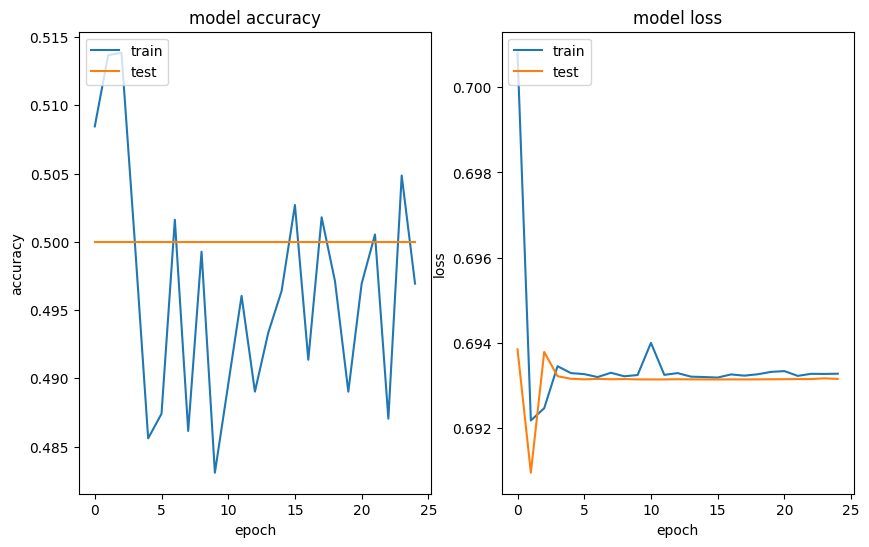

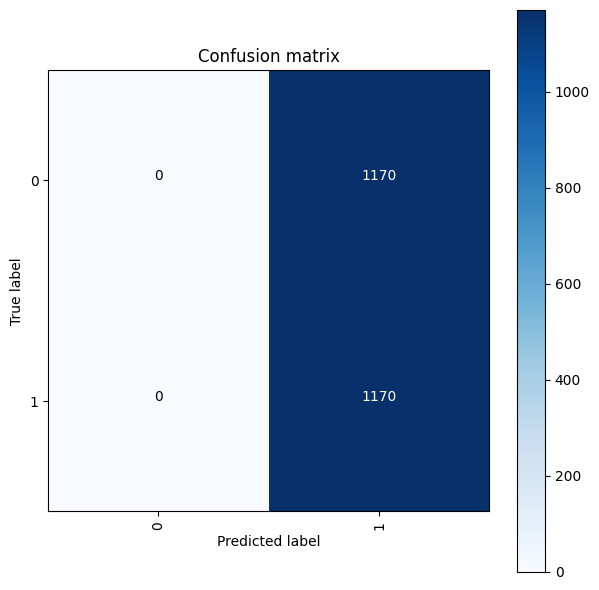

In [40]:
eval_model(build_base_CNN(),X_trainRus, Y_trainRus, X_testRus, Y_testRus, 'base_CNN', True)

/Users/abhivyaktisatti/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,404 (83.61 KB)

 Trainable params: 21,404 (83.61 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,404 (83.61 KB)

 Trainable params: 21,404 (83.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.5444 - loss: 0.6844 - val_accuracy: 0.8316 - val_loss: 0.5183
Epoch 2/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.7578 - loss: 0.5305 - val_accuracy: 0.8248 - val_loss: 0.4240
Epoch 3/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.7904 - loss: 0.4761 - val_accuracy: 0.7697 - val_loss: 0.4777
Epoch 4/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.8106 - loss: 0.4589 - val_accuracy: 0.8085 - val_loss: 0.4469
Epoch 5/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.8193 - loss: 0.4504 - val_accuracy: 0.7987 - val_loss: 0.4381
Epoch 6/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.8056 - loss: 0.4701 - val_accuracy: 0.7949 - val_loss: 0.4461
Epoch 7/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.8190 - loss: 0.4454 - val_accuracy: 0.8423 - val_loss: 0.3839
Epoch 8/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.8233 - loss: 0.4304 - 


Accuracy: 0.8589743375778198 

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step 

              precision    recall  f1-score   support

      IDC(-)       0.86      0.86      0.86      1170
      IDC(+)       0.86      0.86      0.86      1170

    accuracy                           0.86      2340
   macro avg       0.86      0.86      0.86      2340
weighted avg       0.86      0.86      0.86      2340



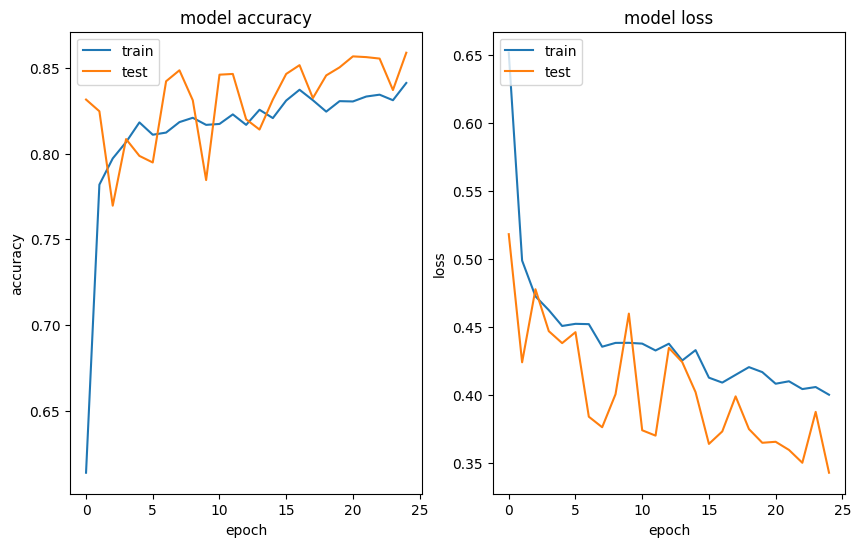

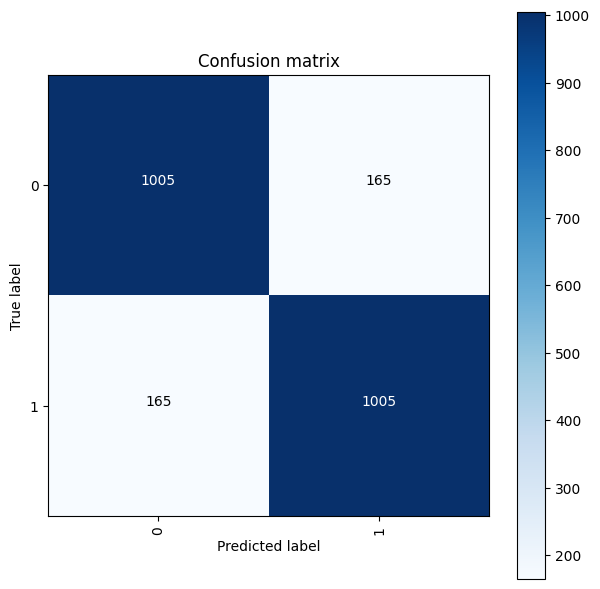

In [43]:
eval_model(build_final_CNN(),X_trainRus, Y_trainRus, X_testRus, Y_testRus, 'final_CNN', True)

In [44]:
base_cnnmodel = load_model('base_CNN.h5')
final_cnnmodel = load_model('final_CNN.h5')

In [45]:
model.save('my_model.keras')


In [46]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

In [12]:
index1 = 109
img_plot(X_testRus, index1)

NameError: name 'img_plot' is not defined

In [13]:
input1 = X_testRus[index1:index1+1]
print('Input Index =',index1)

NameError: name 'X_testRus' is not defined

In [14]:
label1 = Y_testRus[index1].argmax()
base_cnnpred1 = base_cnnmodel.predict(input1)[0].argmax()
final_cnnpred1 = final_cnnmodel.predict(input1)[0].argmax()

print('Predicted Value using base cnn model',base_cnnpred1)
print('Predicted Value using final cnn model',final_cnnpred1)

print("\nTrue Value",label1)

NameError: name 'Y_testRus' is not defined

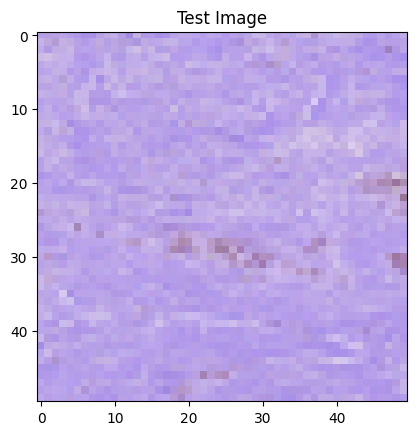

In [60]:
index2 = 57
img_plot(X_testRus, index2)

In [61]:
input2 = X_testRus[index2:index2+1]
print('Input Index =',index2)


Input Index = 57


In [62]:
label2 = Y_testRus[index1].argmax()
base_cnnpred1 = base_cnnmodel.predict(input1)[0].argmax()
final_cnnpred1 = final_cnnmodel.predict(input1)[0].argmax()

print('Predicted Value using base cnn model',base_cnnpred1)
print('Predicted Value using final cnn model',final_cnnpred1)

print("\nTrue Value",label2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Value using base cnn model 1
Predicted Value using final cnn model 1

True Value 0


In [68]:
print("Model input shape:", model.input_shape)


Model input shape: (None, 28, 28, 1)


In [69]:
print("Dataset shape:", X_test.shape)


Dataset shape: (6000, 7500)


In [71]:
import numpy as np

# Reshape to (6000, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# Normalize the data
X_test_reshaped = X_test_reshaped / 255.0  # Scale pixel values to [0, 1]


ValueError: cannot reshape array of size 45000000 into shape (28,28,1)

In [72]:
print("Reshaped data shape:", X_test_reshaped.shape)


NameError: name 'X_test_reshaped' is not defined